In [1]:
pip install transformers torch faiss-cpu elasticsearch pandas numpy flask matplotlib plotly requests beautifulsoup4 scrapy scikit-learn yfinance

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing necessary libraries
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import faiss
from bs4 import BeautifulSoup
from transformers import T5Tokenizer, T5ForConditionalGeneration
import nltk
import re

nltk.download('stopwords')
from nltk.corpus import stopwords

# Set up display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


/Users/ojassharma/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/ojassharma/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ojassharma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import yfinance as yf

# Example: Fetching data for Apple Inc. (AAPL)
stock_data = yf.download('AAPL', start='2000-01-01', end='2024-01-01')

# Display the first few rows of the data
stock_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.844981,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.773741,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.785063,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.717125,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.751094,460734400


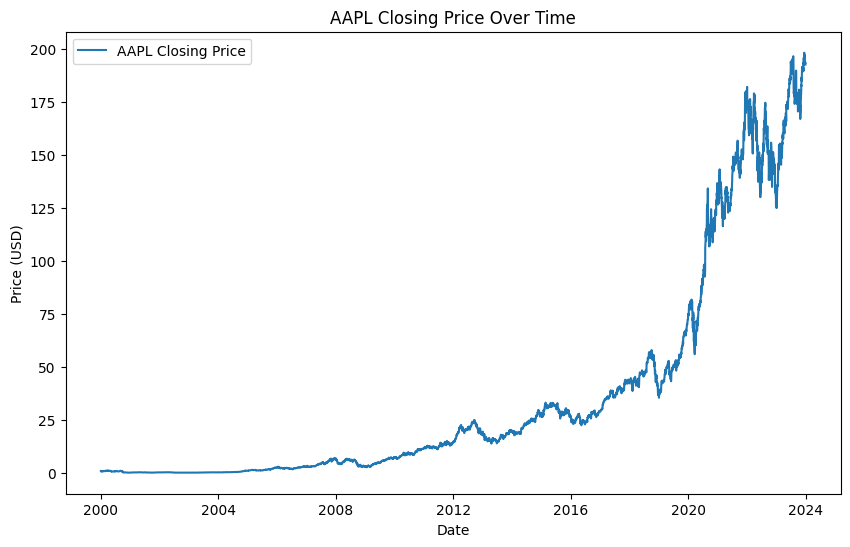

In [4]:
import matplotlib.pyplot as plt

# Plotting the Closing Price
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='AAPL Closing Price')
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [5]:
import pandas as pd

# Fetch the list of S&P 500 companies from Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
sp500_table = pd.read_html(url, header=0)[0]

# Get the tickers of the S&P 500 companies
sp500_tickers = sp500_table['Symbol'].tolist()

# Display the first few tickers to verify
sp500_tickers[:10]


['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']

In [6]:
# Dictionary to store stock data for S&P 500 companies
sp500_data_dict = {}

# Fetching data for each stock in the S&P 500
for ticker in sp500_tickers:
    try:
        # Fetch the stock data
        stock_data = yf.download(ticker, start='2023-01-01', end='2023-08-01')
        
        # Calculate indicators
        stock_data['MA_20'] = stock_data['Close'].rolling(window=20).mean()
        stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()
        stock_data['Daily Return'] = stock_data['Close'].pct_change()
        stock_data['Volatility'] = stock_data['Daily Return'].rolling(window=20).std()
        
        # Store in the dictionary
        sp500_data_dict[ticker] = stock_data
        
    except Exception as e:
        print(f"Could not retrieve data for {ticker}: {e}")

# Example: Display data for one stock
sp500_data_dict['AAPL'].head()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Could not retrieve data for BRK.B: attempt to get argmax of an empty sequence


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  

$BF.B: possibly delisted; No price data found  (1d 2023-01-01 -> 2023-08-01)
Could not retrieve data for BF.B: attempt to get argmax of an empty sequence



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

Could not retrieve data for GEV: attempt to get argmax of an empty sequence


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Could not retrieve data for SW: attempt to get argmax of an empty sequence


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SOLV']: YFChartError("%ticker%: Data doesn't exist for startDate = 1672549200, endDate = 1690862400")
[*********************100%%**********************]  1 of 1 completed


Could not retrieve data for SOLV: attempt to get argmax of an empty sequence


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Could not retrieve data for VLTO: attempt to get argmax of an empty sequence


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,Open,High,Low,Close,Adj Close,Volume,MA_20,MA_50,Daily Return,Volatility
Date,,,,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048050,112117500,NaN,NaN,NaN,NaN
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327515,89113600,NaN,NaN,0.010314,NaN
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998459,80962700,NaN,NaN,-0.010605,NaN
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560883,87754700,NaN,NaN,0.036794,NaN
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086533,70790800,NaN,NaN,0.004089,NaN


In [7]:
import yfinance as yf

# Function to fetch real-time data for S&P 500 stocks
def fetch_real_time_data(tickers):
    real_time_data = {}
    
    for ticker in tickers:
        try:
            stock_data = yf.Ticker(ticker)
            # Fetch real-time data with 1-minute intervals
            live_data = stock_data.history(period="1d", interval="1m")
            
            if live_data.empty:
                print(f"No data retrieved for {ticker}.")
                continue
            
            # Calculate indicators for real-time data
            live_data['MA_20'] = live_data['Close'].rolling(window=20).mean()
            live_data['MA_50'] = live_data['Close'].rolling(window=50).mean()
            live_data['Daily Return'] = live_data['Close'].pct_change()
            live_data['Volatility'] = live_data['Daily Return'].rolling(window=20).std()
            
            real_time_data[ticker] = live_data
            
        except Exception as e:
            print(f"Could not retrieve real-time data for {ticker}: {e}")
            
    return real_time_data

# Example usage: Fetch real-time data for the first 10 S&P 500 stocks
# Ensure 'AAPL' is in the list
sp500_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'FB', 'TSLA', 'BRK.B', 'V', 'JNJ', 'WMT']
real_time_data = fetch_real_time_data(sp500_tickers[:10])

# Check if 'AAPL' data was successfully retrieved before accessing it
if 'AAPL' in real_time_data:
    print(real_time_data['AAPL'].tail())
else:
    print("No real-time data available for AAPL.")


FB: No data found, symbol may be delisted


No data retrieved for FB.


BRK.B: No data found, symbol may be delisted


No data retrieved for BRK.B.
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-08-12 14:47:00-04:00  217.044998  217.065002  216.919998  217.020004   
2024-08-12 14:48:00-04:00  217.020004  217.080002  217.020004  217.029999   
2024-08-12 14:49:00-04:00  217.029999  217.100006  216.986298  217.100006   
2024-08-12 14:50:00-04:00  217.074997  217.164993  217.009995  217.151001   
2024-08-12 14:51:00-04:00  217.050003  217.050003  217.050003  217.050003   

                           Volume  Dividends  Stock Splits       MA_20  \
Datetime                                                                 
2024-08-12 14:47:00-04:00   34284        0.0           0.0  216.928429   
2024-08-12 14:48:00-04:00   33300        0.0           0.0  216.940424   
2024-08-12 14:49:00-04:00   33161        0.0           0.0  216.958175   
2024-08-12 14:50:00-04:00   39819        0.0           0.0  2

In [8]:
import faiss
import numpy as np

# Prepare the data for indexing
# We'll use the closing prices or other metrics as features for simplicity
def prepare_index_data(data_dict):
    index_data = []
    tickers = []
    for ticker, df in data_dict.items():
        if not df.empty:
            # We can use the last row of each stock's data as the feature vector
            last_row = df[['Close', 'MA_20', 'MA_50', 'Volatility']].iloc[-1].values
            index_data.append(last_row)
            tickers.append(ticker)
    return np.array(index_data), tickers

# Prepare the data and tickers
index_data, tickers = prepare_index_data(sp500_data_dict)

# Create the FAISS index
dimension = index_data.shape[1]  # Number of features
index = faiss.IndexFlatL2(dimension)
index.add(index_data)


In [9]:
# Function to search for the top N relevant stocks based on the query vector
def search_stocks(query_vector, top_n=5):
    distances, indices = index.search(query_vector, top_n)
    relevant_stocks = [tickers[i] for i in indices[0]]
    return relevant_stocks, distances

# Example: Assume we want to find stocks similar to the current state of AAPL
query_vector = sp500_data_dict['AAPL'][['Close', 'MA_20', 'MA_50', 'Volatility']].iloc[-1].values.reshape(1, -1)
relevant_stocks, distances = search_stocks(query_vector)
print("Relevant Stocks:", relevant_stocks)


Relevant Stocks: ['AAPL', 'TT', 'ADI', 'CME', 'MAR']


In [10]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the T5 model and tokenizer with legacy=False
tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('t5-small')

# Function to generate investment advice based on retrieved stocks
def generate_investment_advice(query, relevant_stocks):
    context = f"Relevant stocks: {', '.join(relevant_stocks)}."
    input_text = f"{query} Context: {context}"
    input_ids = tokenizer.encode(input_text, return_tensors='pt')
    outputs = model.generate(input_ids, max_length=50)  # Reduced max_length
    advice = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return advice

# Example usage: Generate advice based on the relevant stocks
relevant_stocks = ['AAPL', 'GOOGL', 'TSLA']
query = "What are the best investment opportunities right now?"
advice = generate_investment_advice(query, relevant_stocks)
print("Investment Advice:", advice)



You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


: 

In [ ]:
def investment_advice_pipeline(query):
    # Step 1: Retrieve the most relevant stocks based on current market data
    
    query_vector = sp500_data_dict['AAPL'][['Close', 'MA_20', 'MA_50', 'Volatility']].iloc[-1].values.reshape(1, -1)
    relevant_stocks, _ = search_stocks(query_vector)
    
    # Step 2: Generate investment advice using the retrieved data
    advice = generate_investment_advice(query, relevant_stocks)
    
    return advice

# Example usage: Running the full pipeline
query = "What should I invest in today?"
advice = investment_advice_pipeline(query)
print("Generated Investment Advice:", advice)



Generated Investment Advice: : Relevant stocks: AAPL, TT, ADI, CME, MAR.


In [ ]:
# Test with different queries
test_queries = [
    "Which tech stocks are promising?",
    "What should I avoid investing in right now?",
    "How is the market performing today?",
]

for q in test_queries:
    print(f"Query: {q}")
    print(f"Advice: {investment_advice_pipeline(q)}\n")


Query: Which tech stocks are promising?
Advice: : Relevant stocks: AAPL, TT, ADI, CME, MAR.

Query: What should I avoid investing in right now?
Advice: : Relevant stocks: AAPL, TT, ADI, CME, MAR.

Query: How is the market performing today?
Advice: Stocks: AAPL, TT, ADI, CME, MAR.

